In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('linear_data.csv')
df1.head()

,x,y
0,0.00000,4.447692
1,0.02004,5.024612
2,0.04008,5.869593
3,0.06012,4.722490
4,0.08016,4.877101


In [3]:
x_linear = df1[['x']]
y_linear = df1[['y']]

In [4]:
df2 = pd.read_csv('nonlinear_data.csv')
df2.head()

,x,y
0,0.00000,-0.155043
1,0.02004,0.081809
2,0.04008,-0.014298
3,0.06012,0.143978
4,0.08016,0.019553


In [5]:
x_nonlinear = df2[['x']]
y_nonlinear = df2[['y']]

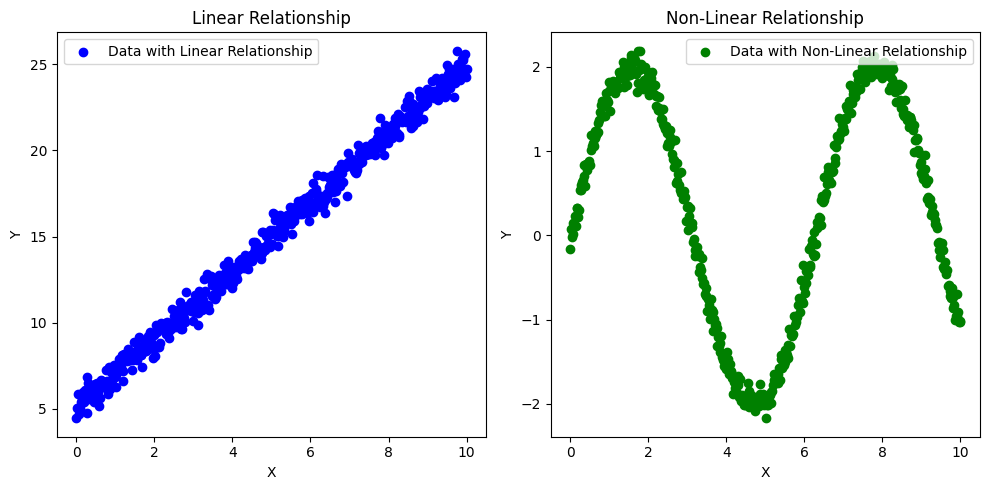

In [7]:
#linear data Ploting
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(x_linear,y_linear,color='blue',label='Data with Linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Relationship')
plt.legend()
#non-linear data plotting

plt.subplot(1,2,2)
plt.scatter(x_nonlinear,y_nonlinear,color='green',label='Data with Non-Linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-Linear Relationship')
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
#Correlation coefficient of linear datasets
df1.corr()

,x,y
x,1.00000,0.99644
y,0.99644,1.00000


In [9]:
#Correlation coefficient of Non-linear datasets
df2.corr()

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


In [10]:
from sklearn.linear_model import LinearRegression

In [11]:

reg1 = LinearRegression()

In [12]:
reg1.fit(x_linear, y_linear)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


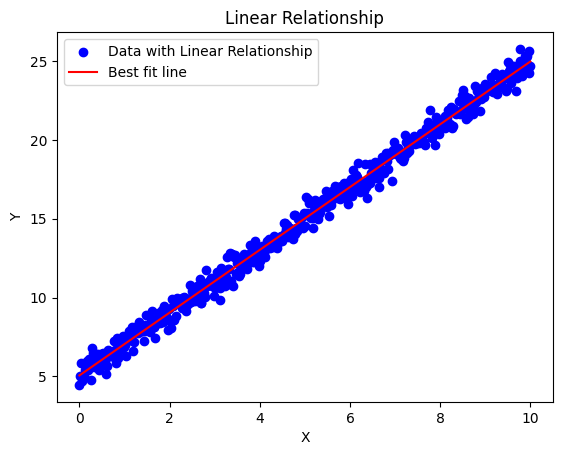

In [13]:
plt.scatter(x_linear, y_linear, color='blue', label='Data with Linear Relationship')
plt.plot(x_linear, reg1.predict(x_linear), color='red', label='Best fit line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Relationship')
plt.legend()

In [14]:
reg1.score(x_linear,y_linear)

0.9928923730526016

In [15]:
##Linear Regression for Non Linear Datasets

reg2 = LinearRegression()

In [16]:
reg2.fit(x_nonlinear, y_nonlinear)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


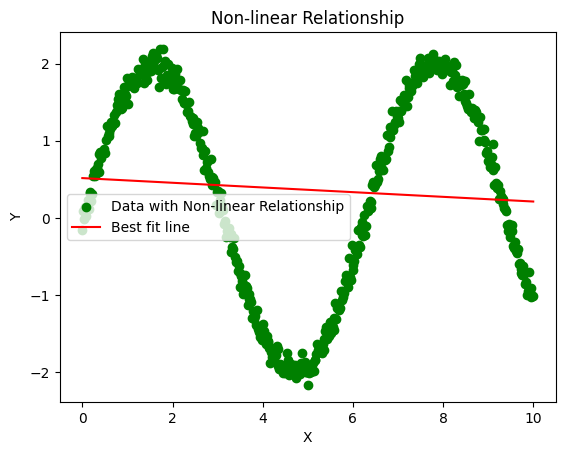

In [17]:
plt.scatter(x_nonlinear, y_nonlinear, color='green', label='Data with Non-linear Relationship')
plt.plot(x_nonlinear, reg2.predict(x_nonlinear), color='red', label='Best fit line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-linear Relationship')
plt.legend()

In [18]:
reg2.score(x_nonlinear, y_nonlinear)

0.004321199719043656

In [19]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
poly = PolynomialFeatures(degree=6)

In [21]:
X_poly = poly.fit_transform(x_nonlinear)

In [22]:

reg_poly = LinearRegression()

In [28]:

reg_poly.fit(X_poly, y_nonlinear)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
X_poly.shape

(500, 7)

In [29]:
reg_poly.coef_

array([[ 0.00000000e+00,  1.58461947e+00,  1.04154581e+00,
        -1.19685907e+00,  3.11779791e-01, -3.14743693e-02,
         1.10569186e-03]])

In [30]:
reg_poly.intercept_

array([-0.0042489])

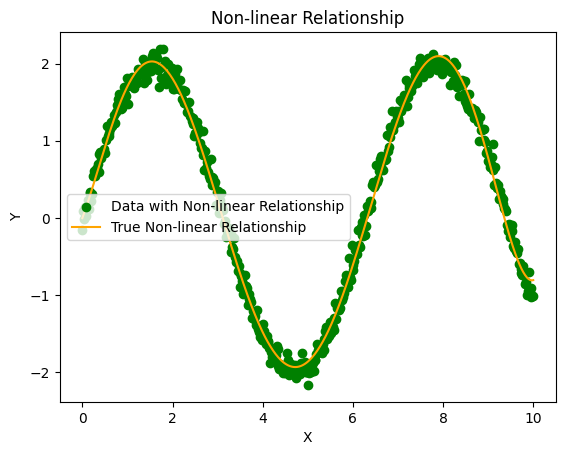

In [31]:
plt.scatter(x_nonlinear, y_nonlinear, color='green', label='Data with Non-linear Relationship')
plt.plot(x_nonlinear, reg_poly.predict(X_poly), color='orange', label='True Non-linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-linear Relationship')
plt.legend()

In [32]:
reg_poly.score(X_poly, y_nonlinear)

0.9930624844497349

In [33]:

from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_poly,y_nonlinear, test_size=.30, random_state=42)

In [35]:
reg = LinearRegression()

In [36]:
reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [37]:
reg.score(X_train, y_train) 

0.9931832994582883

In [38]:
reg.score(X_test, y_test)

0.9926529019609499